In [13]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
# data
data = pd.read_pickle('../data/cleaned_train.pkl')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## data types

In [3]:
pd.unique(data.dtypes)

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('int32')],
      dtype=object)

In [4]:
# numerical
num_feat = data.select_dtypes(include=[np.number])
num_feat.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
# categorical
cat_feat = data.select_dtypes(include=[np.object])
cat_feat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [6]:
# discrete
disc_ = num_feat[['MSSubClass','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','BsmtFullBath',
                  'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                  'Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold', 'YrSold',]]
disc_

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,
1,60,7,5,2003,2003,1,0,2,1,3,1,8,0,2003,2,2,2008
2,20,6,8,1976,1976,0,1,2,0,3,1,6,1,1976,2,5,2007
3,60,7,5,2001,2002,1,0,2,1,3,1,6,1,2001,2,9,2008
4,70,7,5,1915,1970,1,0,1,0,3,1,7,1,1998,3,2,2006
5,60,8,5,2000,2000,1,0,2,1,4,1,9,1,2000,3,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,6,5,1999,2000,0,0,2,1,3,1,7,1,1999,2,8,2007
1457,20,6,6,1978,1988,1,0,2,0,3,1,7,2,1978,2,2,2010
1458,70,7,9,1941,2006,0,0,2,0,4,1,9,2,1941,1,5,2010


In [7]:
# continues
cont_ = num_feat[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                  'MiscVal', 'SalePrice']]
cont_

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1457,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1458,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500


## frequency analysis

In [8]:
# absolute and relative frequency
def freq_(dataframe,label):
    df = pd.DataFrame(dataframe[label].value_counts().reset_index())
    df['rel. frequency'] = (df[label]/dataframe.shape[0])*100
    df.rename(columns={'index':label,
                       label:'abs. frequency'},inplace=True)
    df['cum. abs. frequency'] = np.cumsum(df['abs. frequency'])
    df['cum. rel. frequency'] = np.cumsum(df['rel. frequency'])

    return df

In [9]:
freq_(disc_,'OverallCond')

,OverallCond,abs. frequency,rel. frequency,cum. abs. frequency,cum. rel. frequency
0,5,821,56.232877,821,56.232877
1,6,252,17.260274,1073,73.493151
2,7,205,14.041096,1278,87.534247
3,8,72,4.931507,1350,92.465753
4,4,57,3.904110,1407,96.369863
5,3,25,1.712329,1432,98.082192
6,9,22,1.506849,1454,99.589041
7,2,5,0.342466,1459,99.931507
8,1,1,0.068493,1460,100.000000


In [10]:
# frequency analysis demo
freq_(disc_,'MSSubClass')

,MSSubClass,abs. frequency,rel. frequency,cum. abs. frequency,cum. rel. frequency
0,20,536,36.712329,536,36.712329
1,60,299,20.479452,835,57.191781
2,50,144,9.863014,979,67.054795
3,120,87,5.958904,1066,73.013699
4,30,69,4.726027,1135,77.739726
5,160,63,4.315068,1198,82.054795
6,70,60,4.109589,1258,86.164384
7,80,58,3.972603,1316,90.136986
8,90,52,3.561644,1368,93.698630
9,190,30,2.054795,1398,95.753425


In [11]:
freq_(cat_feat,'MSZoning')

,MSZoning,abs. frequency,rel. frequency,cum. abs. frequency,cum. rel. frequency
0,RL,1151,78.835616,1151,78.835616
1,RM,218,14.931507,1369,93.767123
2,FV,65,4.452055,1434,98.219178
3,RH,16,1.095890,1450,99.315068
4,C (all),10,0.684932,1460,100.000000


## visualizations

* pie charts - use on typically nominal features

In [22]:
pie_data = freq_(cat_feat,'MSZoning')
plt.figure(figsize=[8,8],dpi=300)
fig = px.pie(values=pie_data['abs. frequency'],
             names=pie_data['MSZoning'],
             color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

<Figure size 2400x2400 with 0 Axes>

* bar charts - use on qualitative features

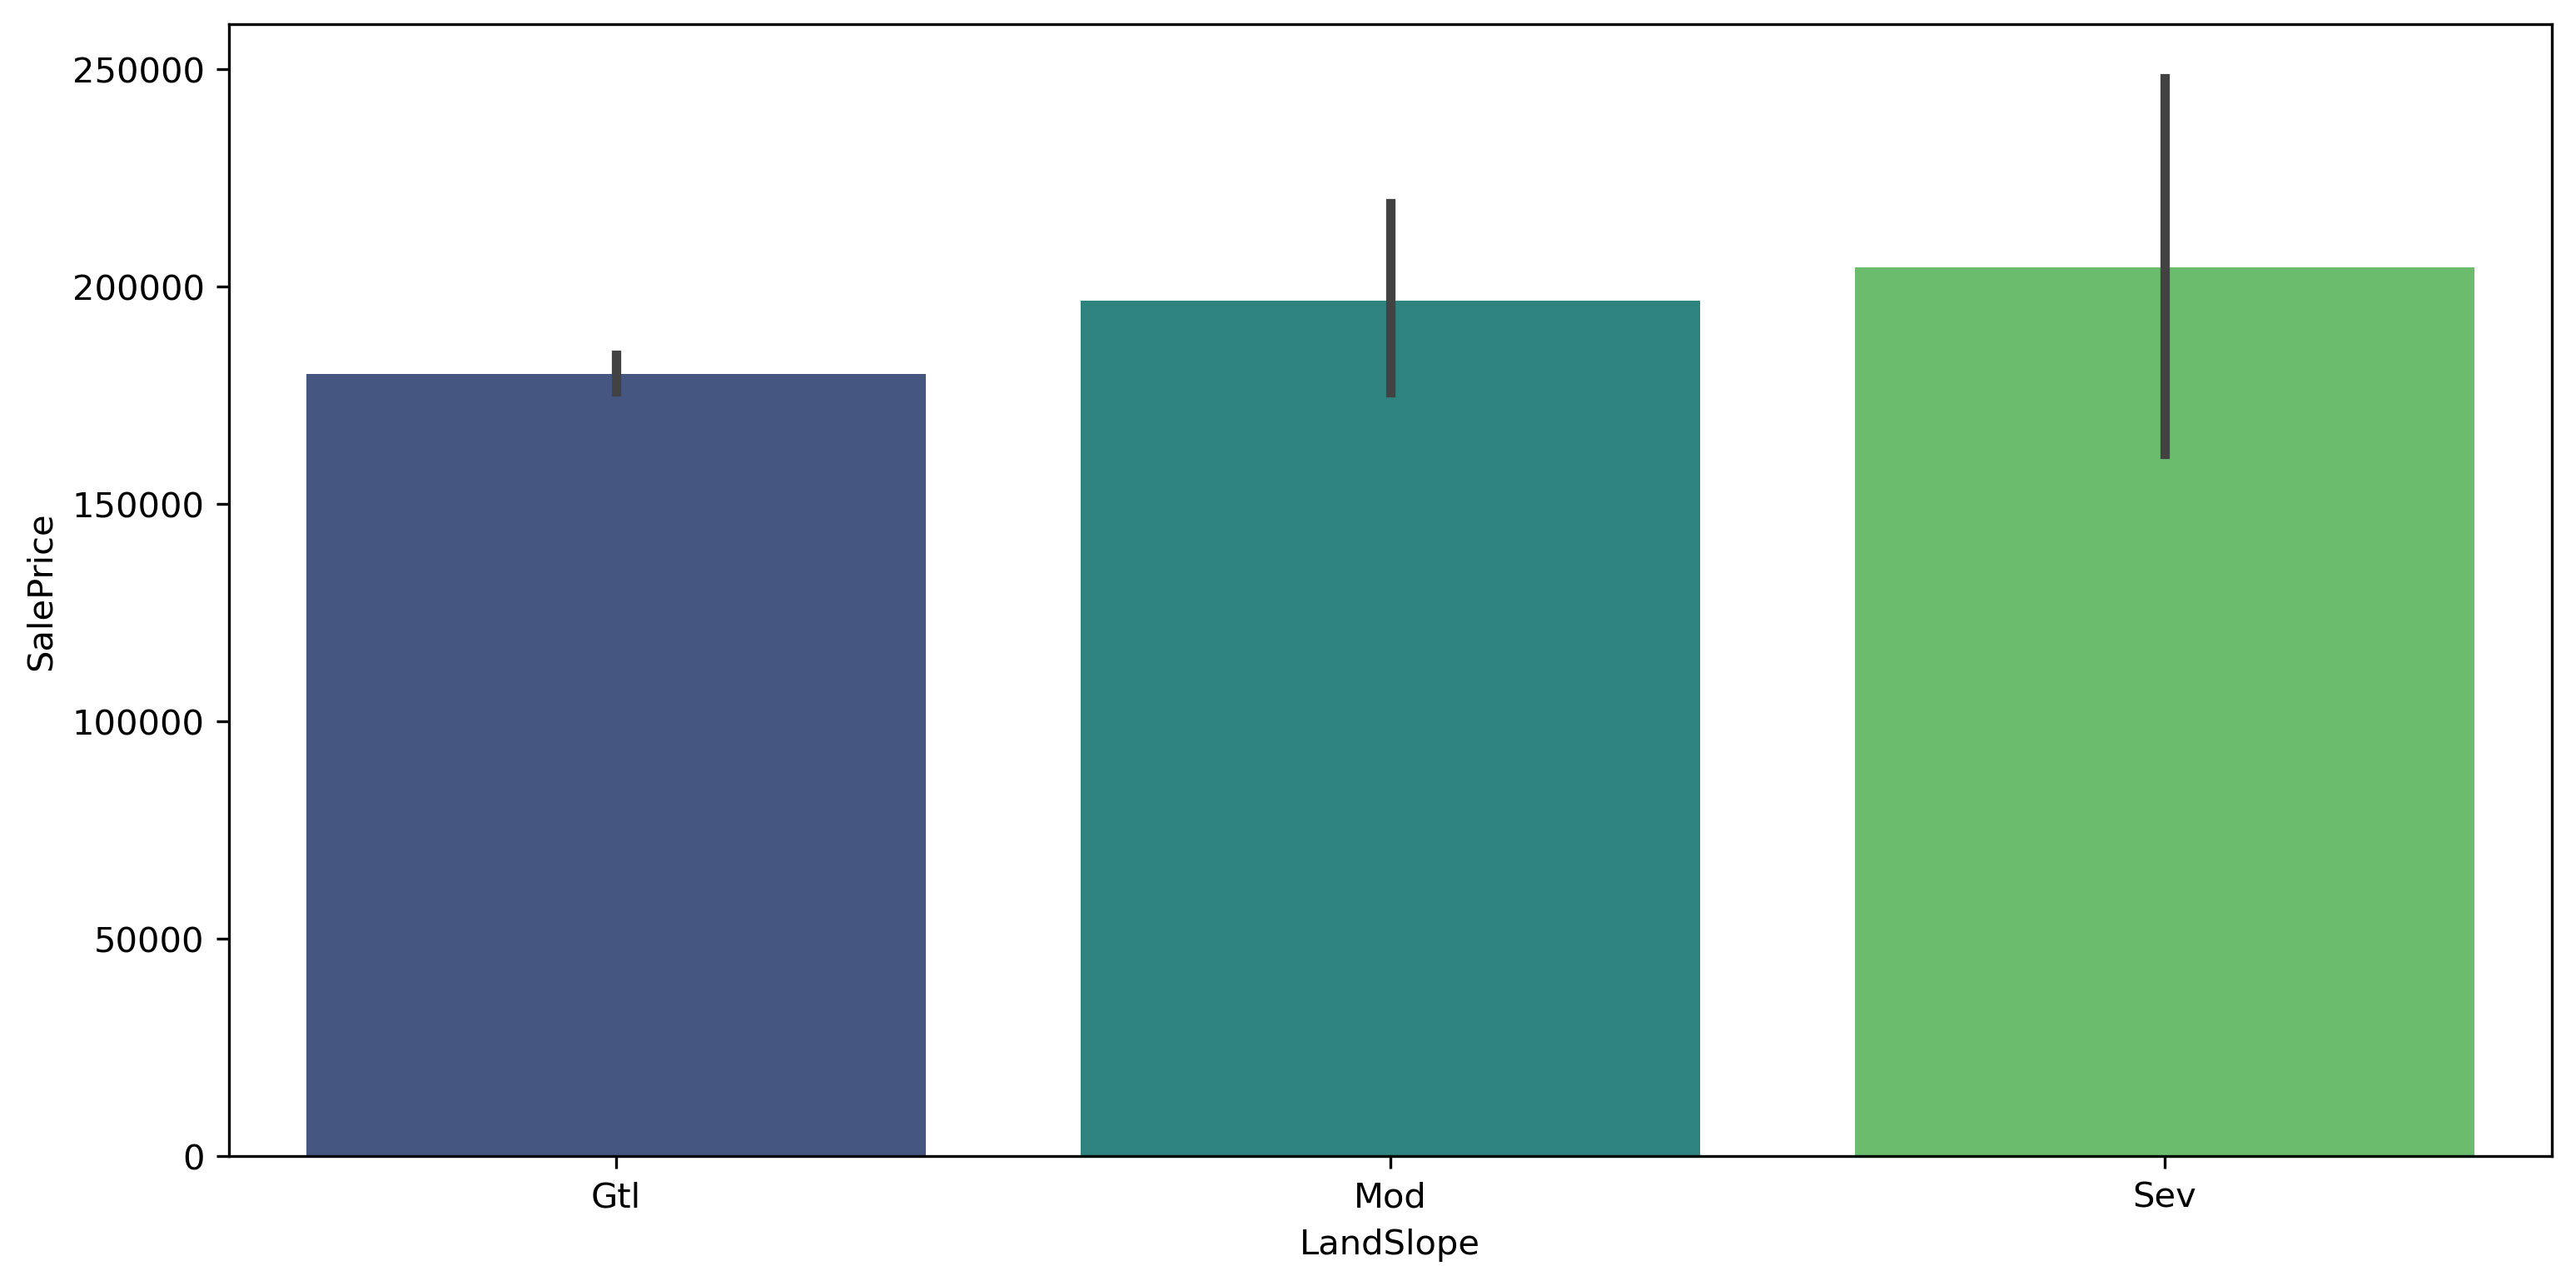

In [26]:
plt.figure(figsize=[12,6],dpi=300)
sns.barplot(x=cat_feat['LandSlope'],y=num_feat['SalePrice'],palette='viridis')
plt.show()

* line charts - typically use with time series data

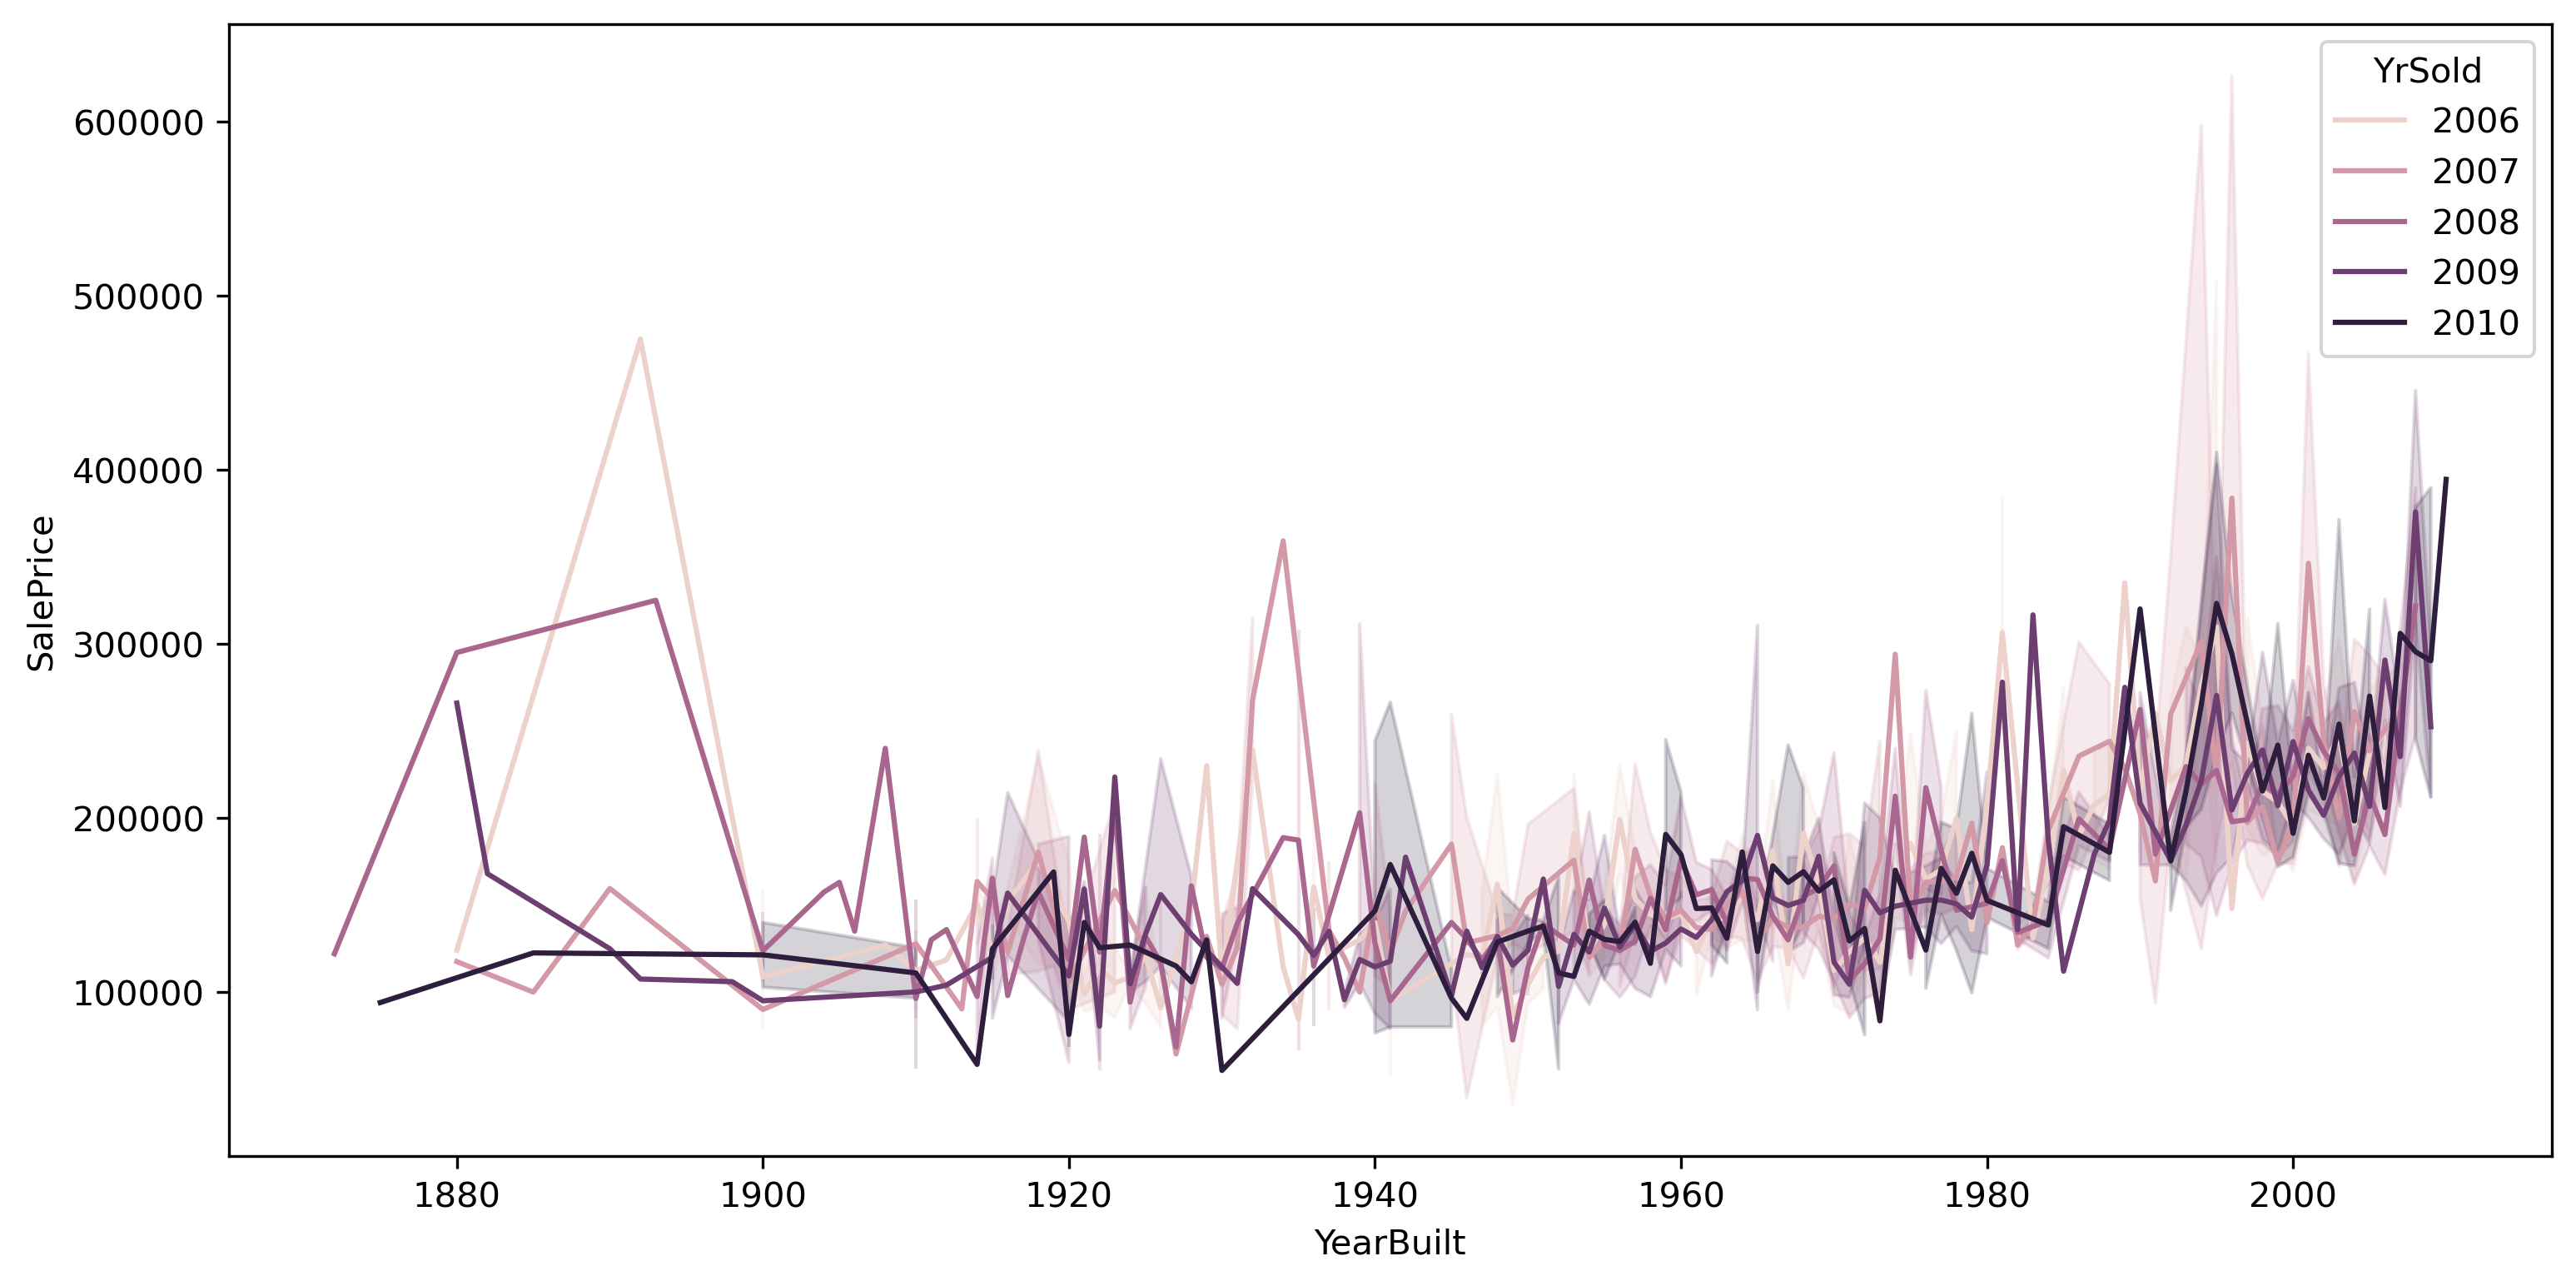

In [28]:
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=num_feat['YearBuilt'],y=num_feat['SalePrice'],hue=num_feat['YrSold'])
plt.show()